# Imoprt

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Information Of DataFrame

In [7]:
#Load DataFrame By Path csv
def LoadDataFrame(path):
    df = pd.read_csv(path)
    print("--->Load DataFrame")
    return df

In [8]:
#-->Save To csv Document
def SaveToCsv(df,path):
    if not df.empty:
        df.to_csv(path)
        print("\n-->Sucssesful Save Fix DataFrame\n")
    else:
        print("\n-->Not Succses Save Fix DataFrame\n")

In [9]:
path = "./CSV_Document/AsosDataOptimize/AsosDataOptimize.csv"
df = LoadDataFrame(path)

--->Load DataFrame


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1798 non-null   int64  
 1   ProductKey     1798 non-null   int64  
 2   Name           1798 non-null   object 
 3   NumberCatalog  1798 non-null   int64  
 4   Gender         1798 non-null   object 
 5   Brand          1798 non-null   object 
 6   Price          1798 non-null   float64
 7   Color          1798 non-null   object 
 8   Details        1798 non-null   int64  
 9   Sole           1798 non-null   object 
 10  Upper          1798 non-null   object 
 11  Type           1798 non-null   object 
 12  GlobalRank     1798 non-null   int64  
 13  Reviews        1798 non-null   int64  
 14  RankSize       1798 non-null   float64
 15  RankComfort    1798 non-null   float64
 16  RankQuality    1798 non-null   float64
dtypes: float64(4), int64(6), object(7)
memory usage: 238

# EDA

In [11]:
#--->Create A Sersils By Column Name
def one_dim_plot(sr, plot_type, axis, titles):
    sr.plot(kind = plot_type, ax = axis ,title=titles, autopct='%1.1f%%')

In [12]:
#--->Create A Sersils By Column Name
def GetFrequenftElements(df, ColumnName , numFrequenft):
    sr = df[ColumnName].value_counts(ascending=False)[0:numFrequenft].sort_index(ascending = True)
    return sr

In [13]:
def CreatPieGraph(df):
    fig, ax = plt.subplots(1,3, figsize=(20,10))
    one_dim_plot(GetFrequenftElements(df,"Color",10),"pie",ax[0] , "Top 10 Color")
    one_dim_plot(GetFrequenftElements(df,"Brand",10),"pie",ax[1] , "Top 10 Brand")
    one_dim_plot(GetFrequenftElements(df,"Type",10),"pie",ax[2], "Top 10  Type")
    return fig

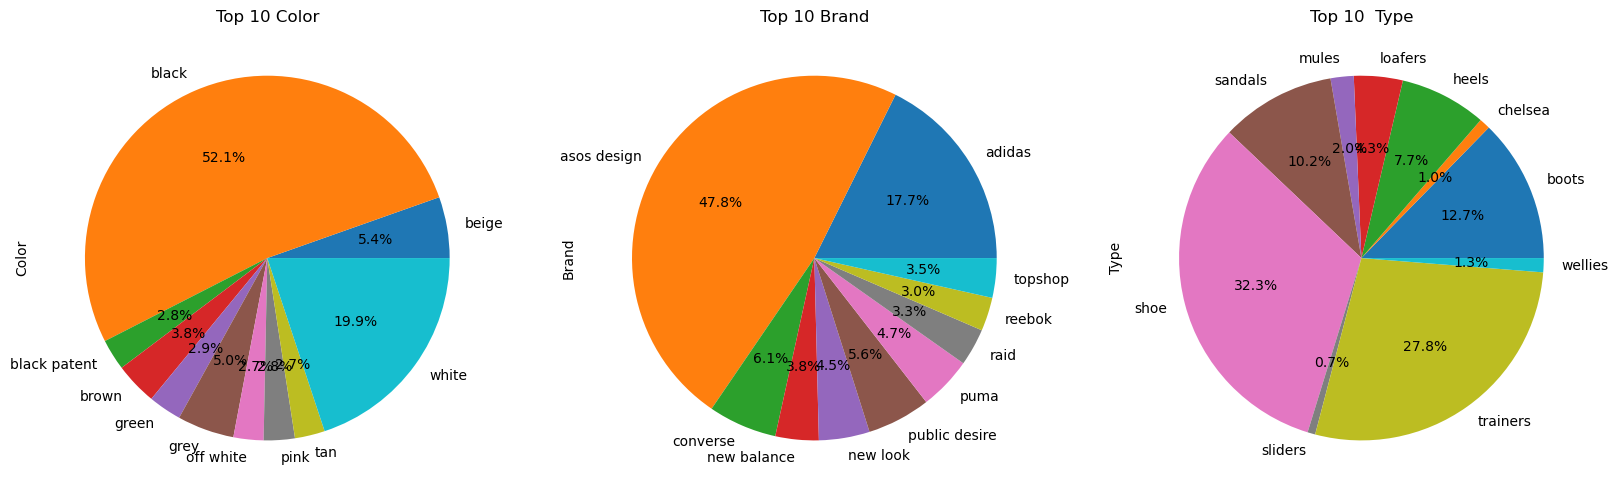

In [14]:
fig = CreatPieGraph(df)

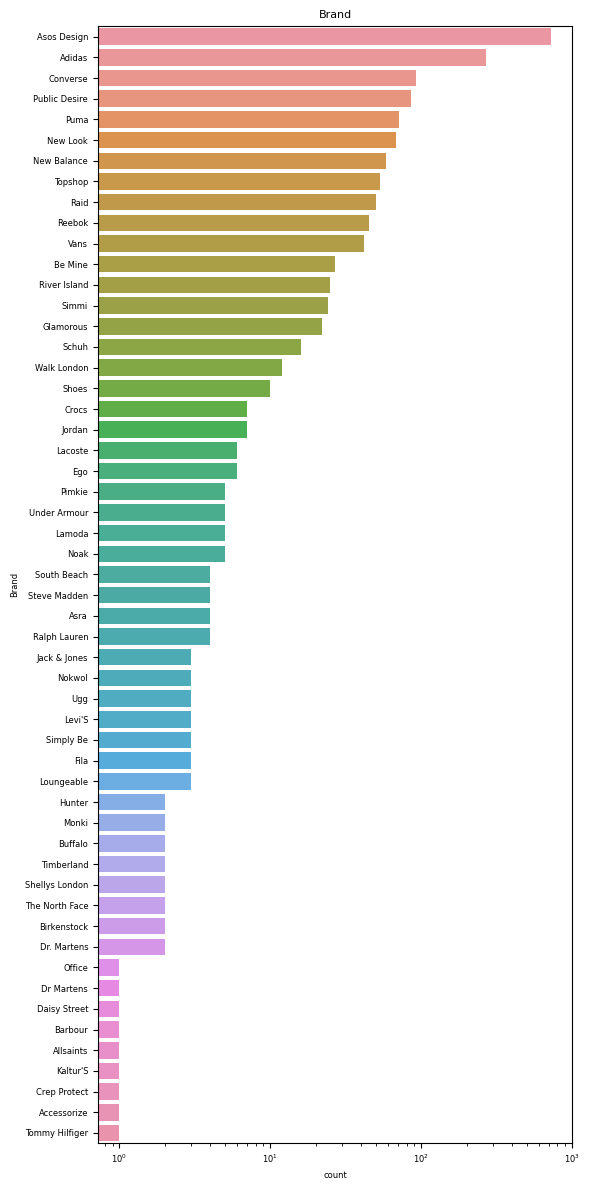

In [15]:
plt.figure(figsize = (6, 12))
Brands = list( map(lambda x: x.title(), df["Brand"].value_counts().keys().tolist()))
ax = sns.countplot(y = "Brand", data = df,  order = df["Brand"].value_counts().index)

ax.set_xscale("log")
ax.axes.set_title("Brand", fontsize = 8)
ax.set_xlabel("count", fontsize = 6)
ax.set_ylabel("Brand", fontsize = 6)
ax.tick_params(labelsize = 6)

ax.set_yticklabels(Brands, rotation = 0, fontsize = 6)
plt.tight_layout()
plt.show()

In [16]:
def one_dim_plot2(ctb , kind , axes, titles):
    ctb.plot(kind="bar" , figsize=(15,12),ax=axes , title=titles)

In [17]:
def CreateCrosstab(df, nameColumn1 , nameColumn2):
    ctb = pd.crosstab(df[nameColumn1] , df[nameColumn2] , normalize ="index")
    return ctb

In [18]:
def CrosstabGraph(df):
    fig, ax = plt.subplots(3,1, figsize=(15,50))
    one_dim_plot2(CreateCrosstab(df,"Type","Gender"),"bar",ax[0] , "Gender vs Type")
    one_dim_plot2(CreateCrosstab(df,"Brand","Gender"),"bar",ax[1] , "Gender vs Brand")
    one_dim_plot2(CreateCrosstab(df,"Details","Gender"),"bar",ax[2] , "Gender vs Count Details")
    fig.tight_layout(pad=2.0)
    return fig

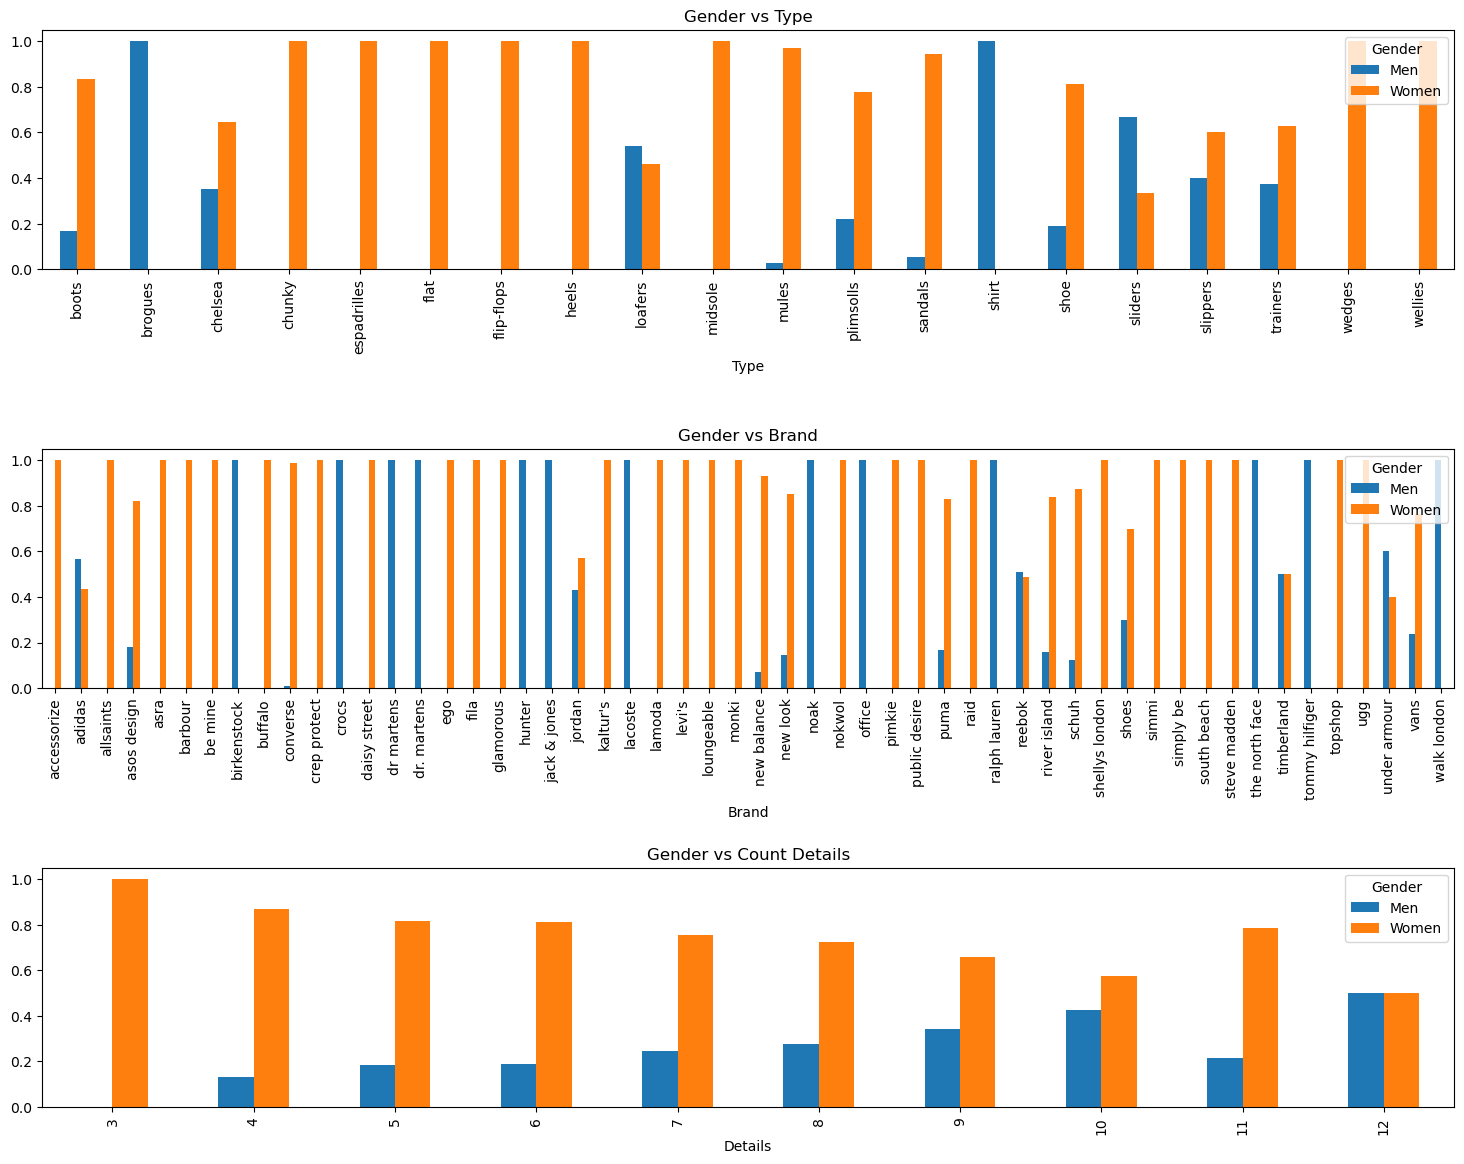

In [19]:
fig = CrosstabGraph(df)

--->Destiny Of Price


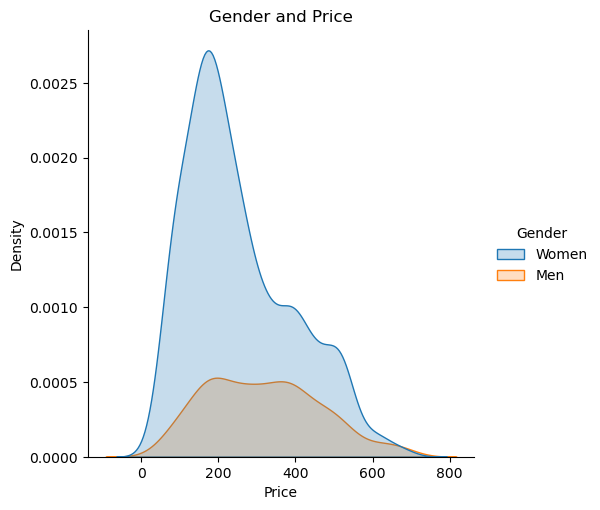

In [20]:
print("--->Destiny Of Price")
sns.displot(df, x="Price", kind="kde" , hue="Gender",fill=True).set(title="Gender and Price")

# Connection Between Price And Rank

C:\Users\danie\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


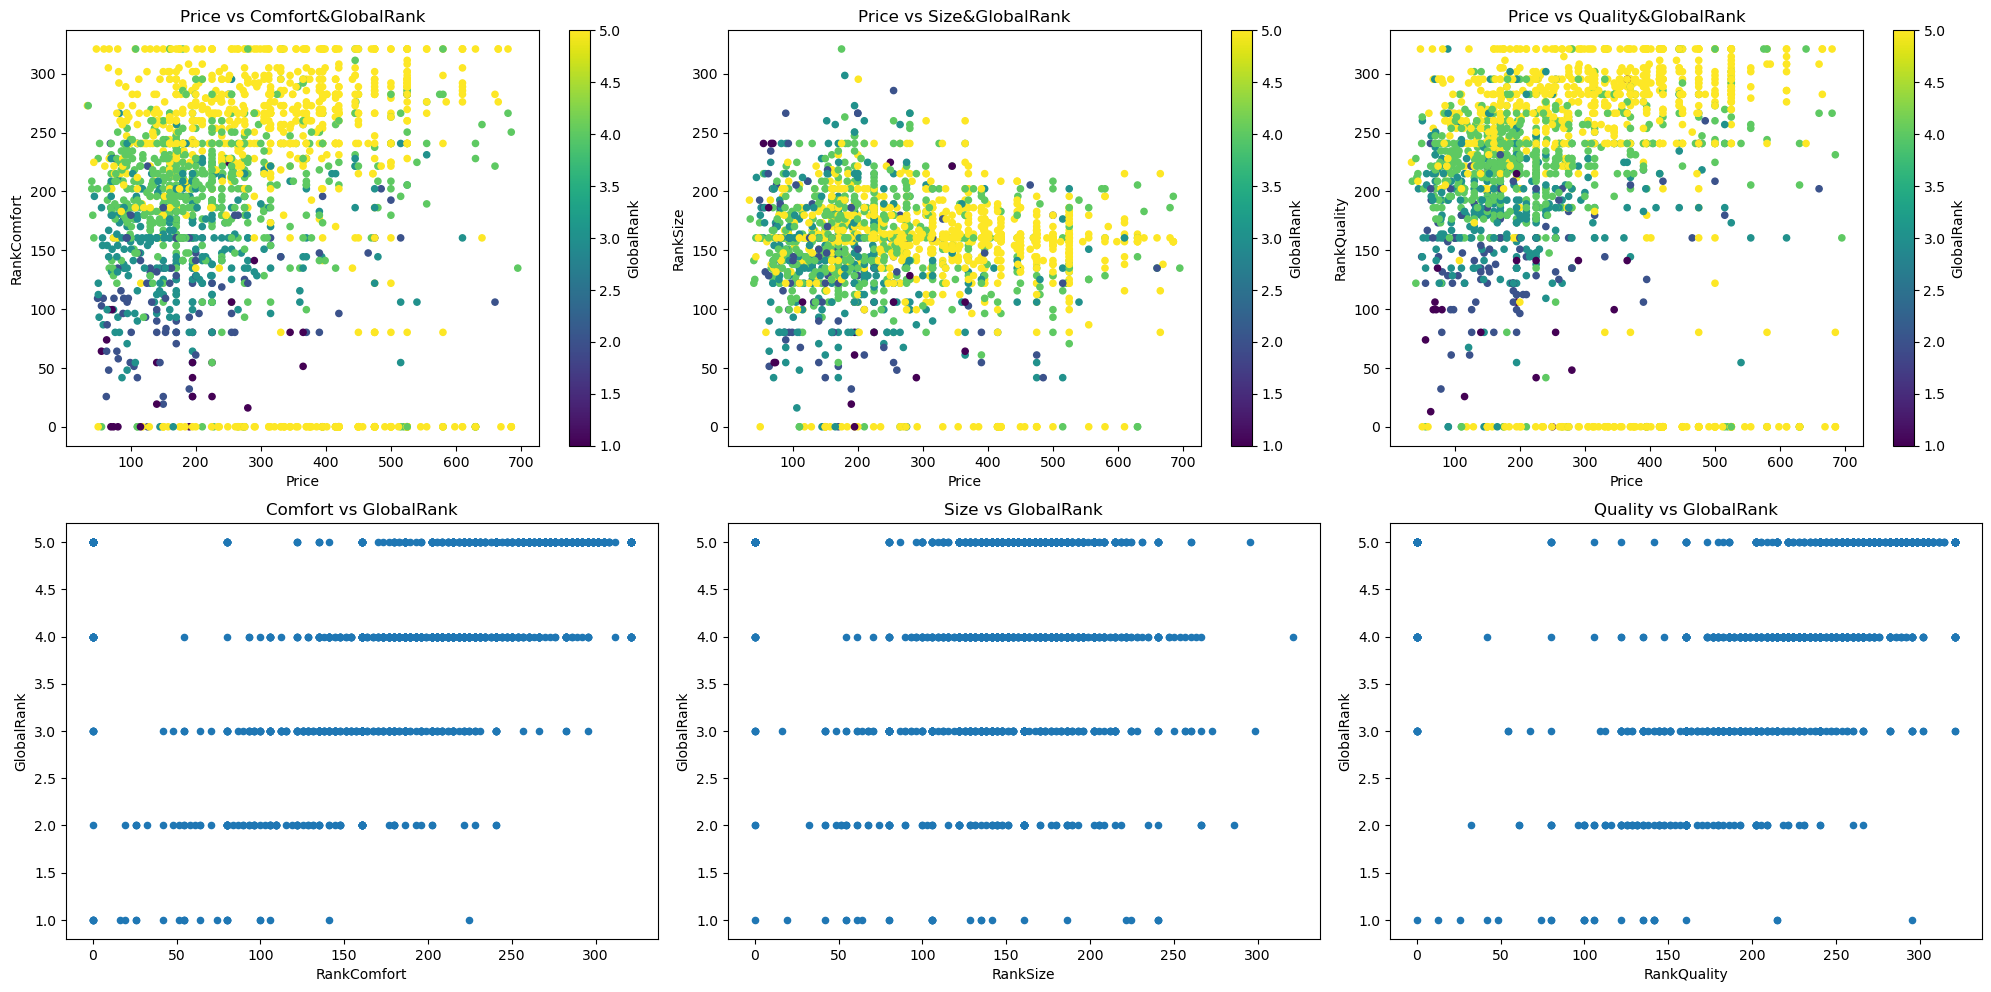

In [21]:
fig , axes = plt.subplots(2,3, figsize=(20,3))
df.plot.scatter(ax=axes[0,0],x="Price" , y="RankComfort",c="GlobalRank", colormap='viridis', title="Price vs Comfort&GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[0,1],x="Price" , y="RankSize",c="GlobalRank", colormap='viridis', title="Price vs Size&GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[0,2],x="Price" , y="RankQuality",c="GlobalRank", colormap='viridis', title="Price vs Quality&GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[1,0],x="RankComfort" , y="GlobalRank", colormap='viridis', title="Comfort vs GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[1,1],x="RankSize" , y="GlobalRank", colormap='viridis', title="Size vs GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[1,2],x="RankQuality" , y="GlobalRank", colormap='viridis', title="Quality vs GlobalRank",figsize=(20,10))
fig.tight_layout(pad=1.0)

[Text(0.5, 1.0, 'Price By Count')]

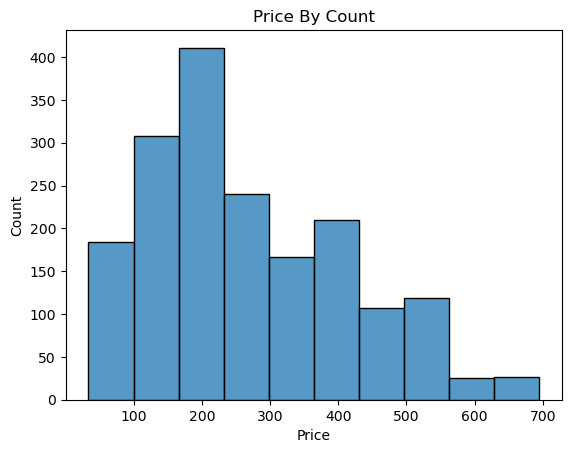

In [22]:
sns.histplot(df, x="Price", bins=10).set(title="Price By Count")

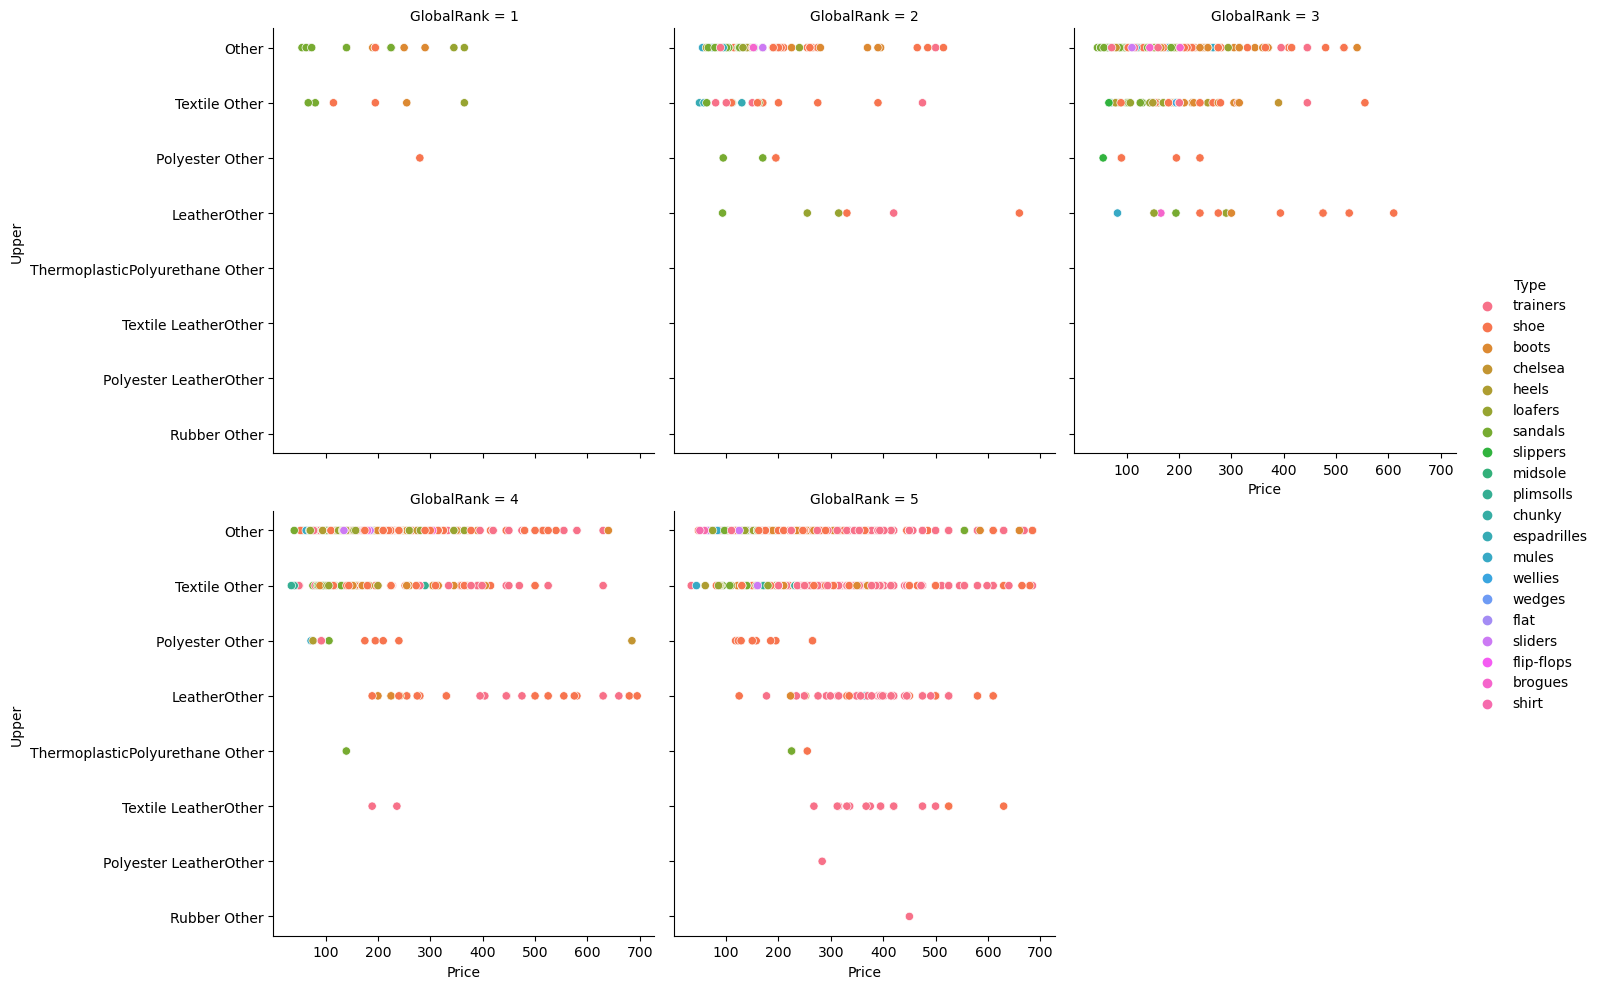

In [23]:
sns.relplot(data=df, x="Price", y="Upper",col="GlobalRank", hue="Type",kind="scatter" ,col_wrap=3 , sizes=(100,30) ,aspect=1)

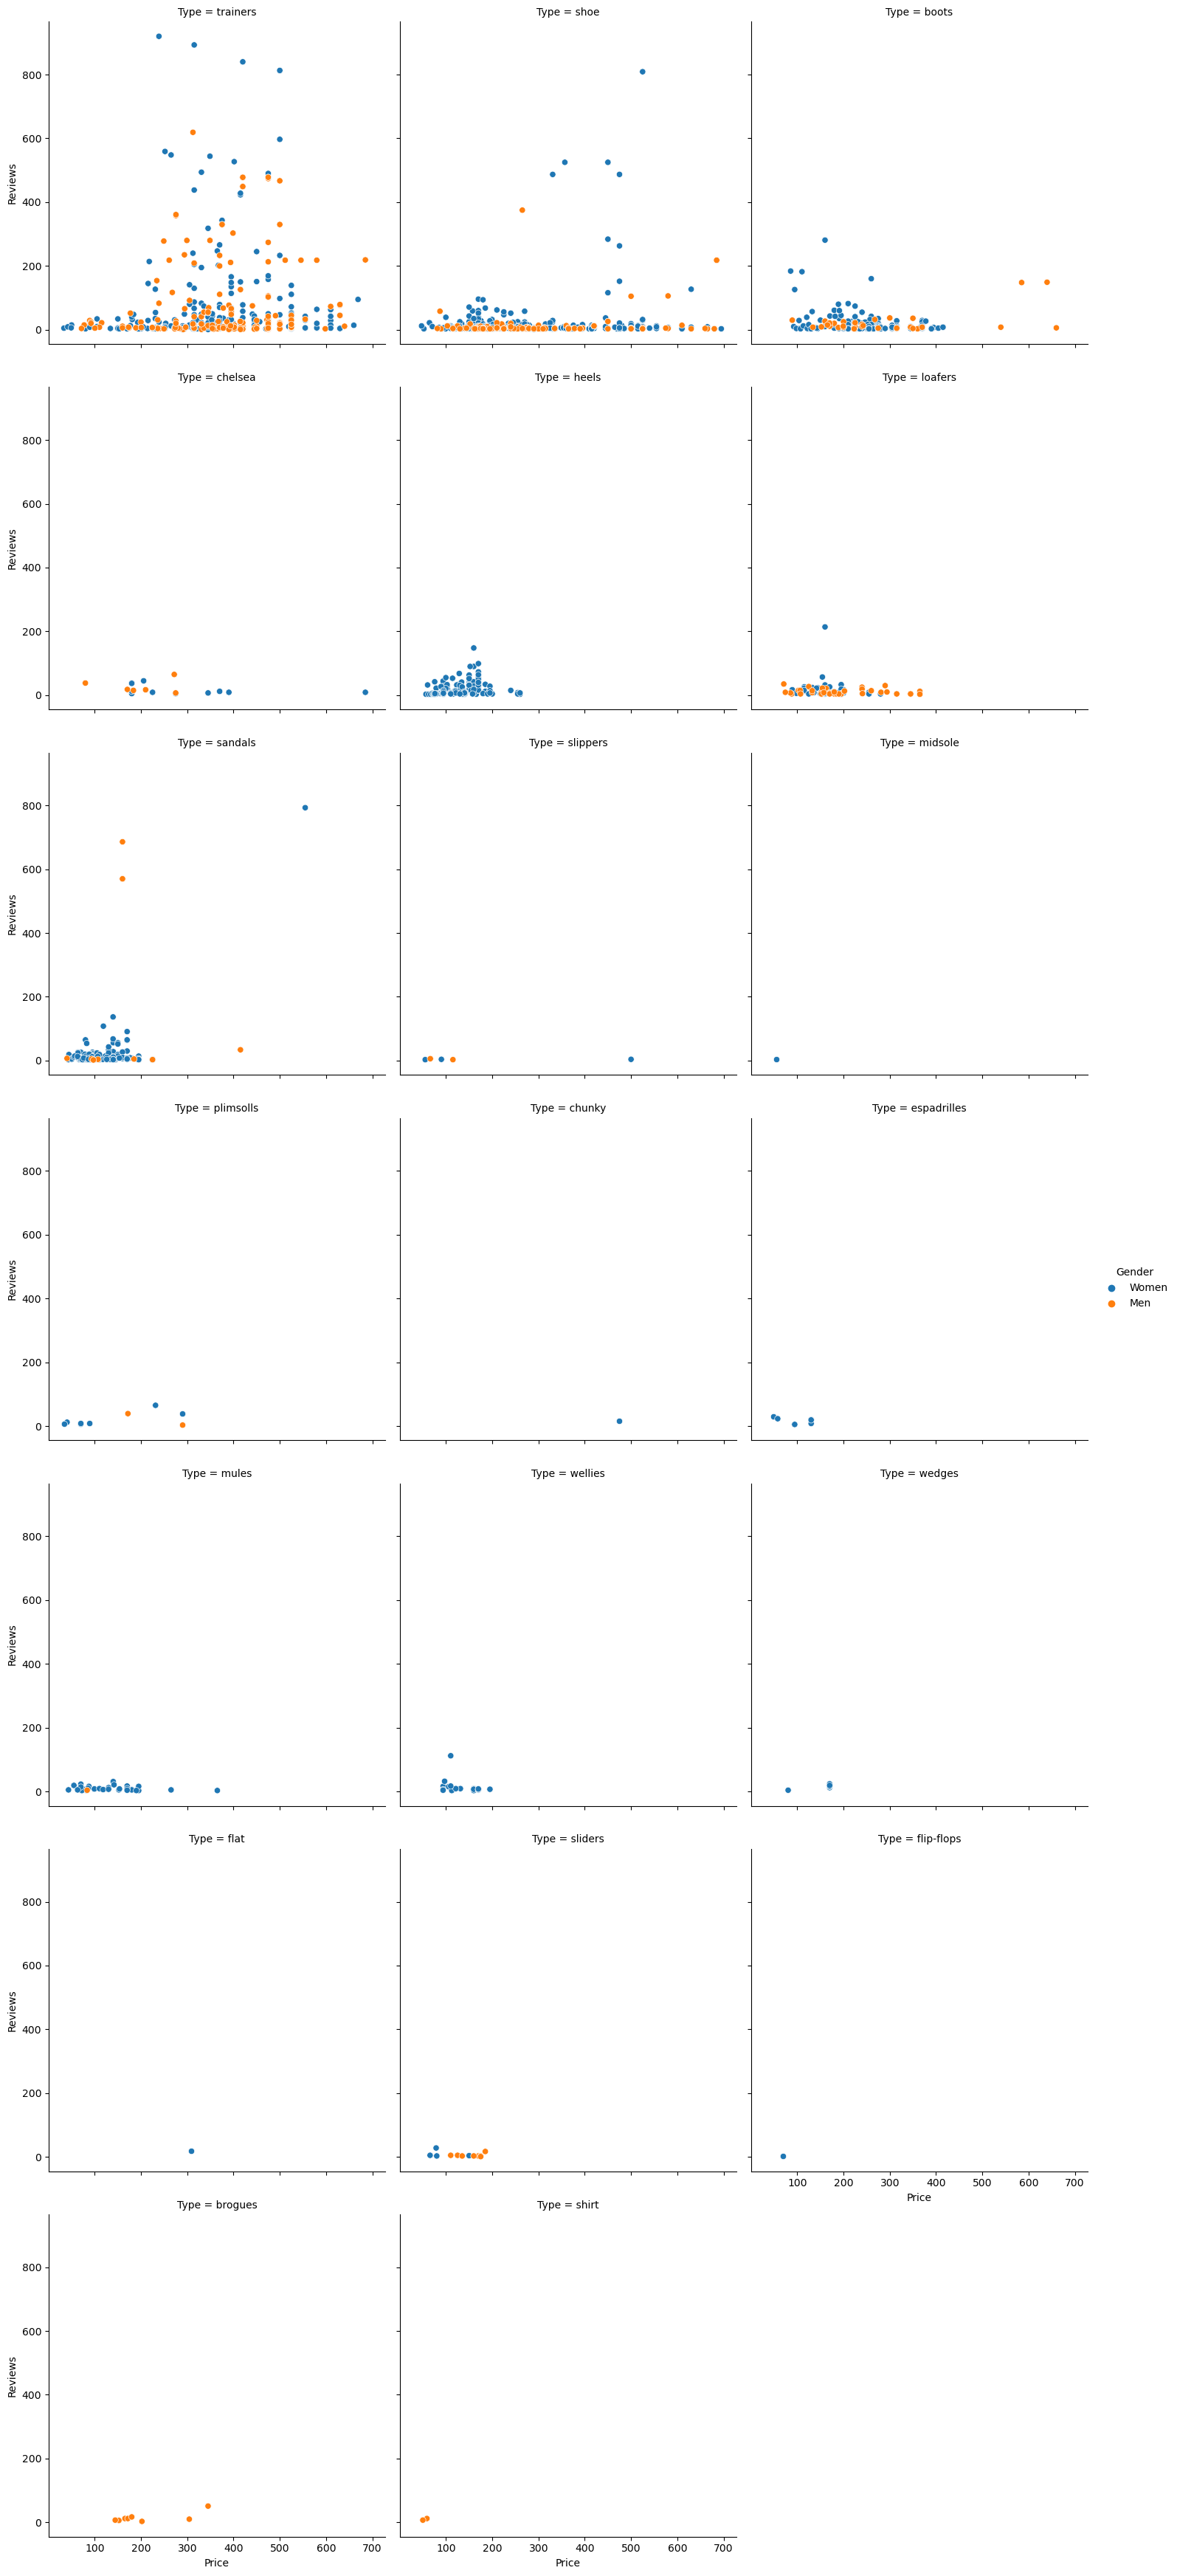

In [24]:
sns.relplot(data=df, x="Price", y="Reviews",col="Type", hue="Gender",kind="scatter" ,col_wrap=3 , sizes=(100,30) ,aspect=1)

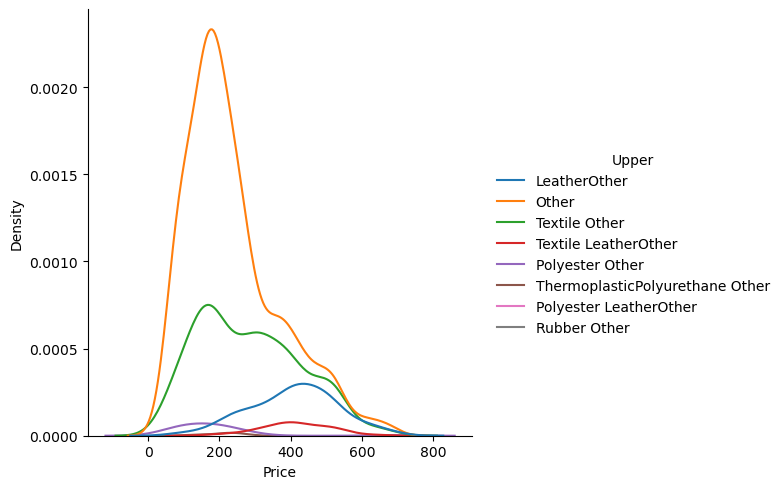

In [25]:
sns.displot(df, x="Price", hue="Upper", kind="kde" , warn_singular=False)

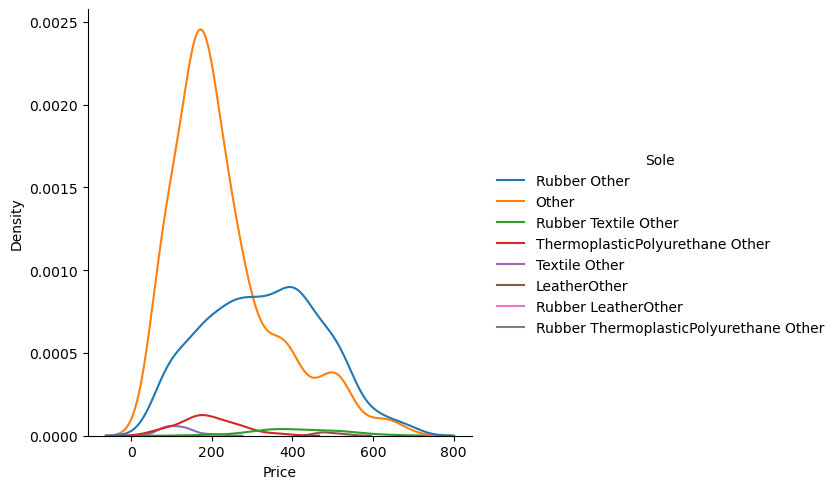

In [26]:
sns.displot(df, x="Price", hue="Sole", kind="kde" , warn_singular=False)

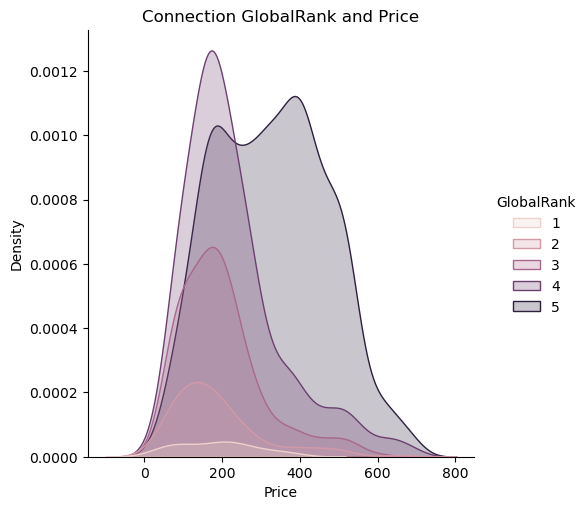

In [27]:
sns.displot(df, x="Price", hue="GlobalRank", kind="kde",fill=True , warn_singular=False).set(title="Connection GlobalRank and Price")

# Example Of Brand

In [28]:
def MakeDataFrameGroup(df , nameColumn , value):
    df1 = df[df[nameColumn] == value]
    return df1

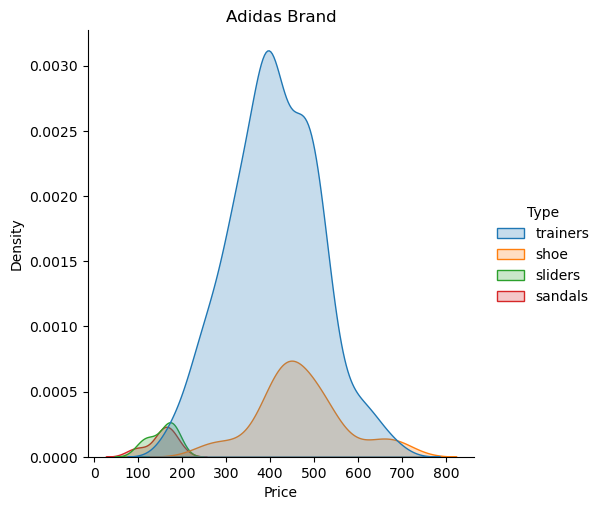

In [29]:
df1 = MakeDataFrameGroup(df , "Brand" , "adidas")
sns.displot(df1, x="Price", hue="Type", kind="kde", fill=True , warn_singular=False).set(title='Adidas Brand')

# Example Of Color

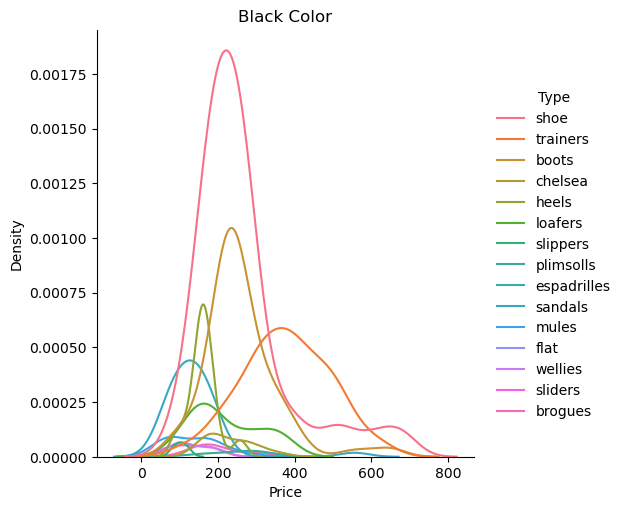

In [30]:
df1 = MakeDataFrameGroup(df , "Color" , "black")
sns.displot(df1, x="Price", hue="Type", kind="kde", fill=False , warn_singular=False).set(title='Black Color')

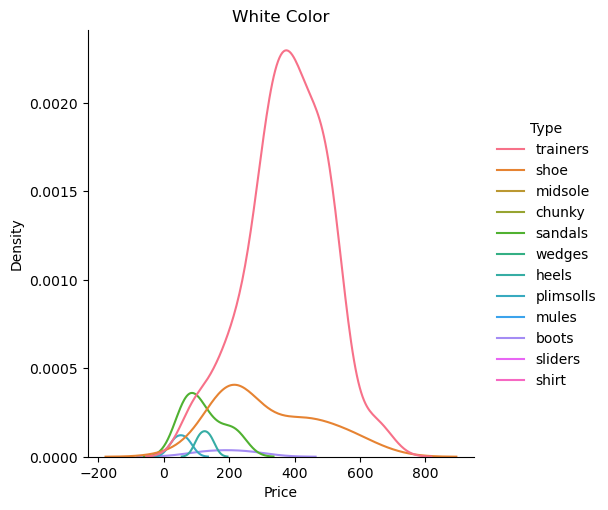

In [31]:
df1 = MakeDataFrameGroup(df , "Color" , "white")
sns.displot(df1, x="Price", hue="Type", kind="kde", fill=False , warn_singular=False).set(title='White Color')

# Outliiers And Average

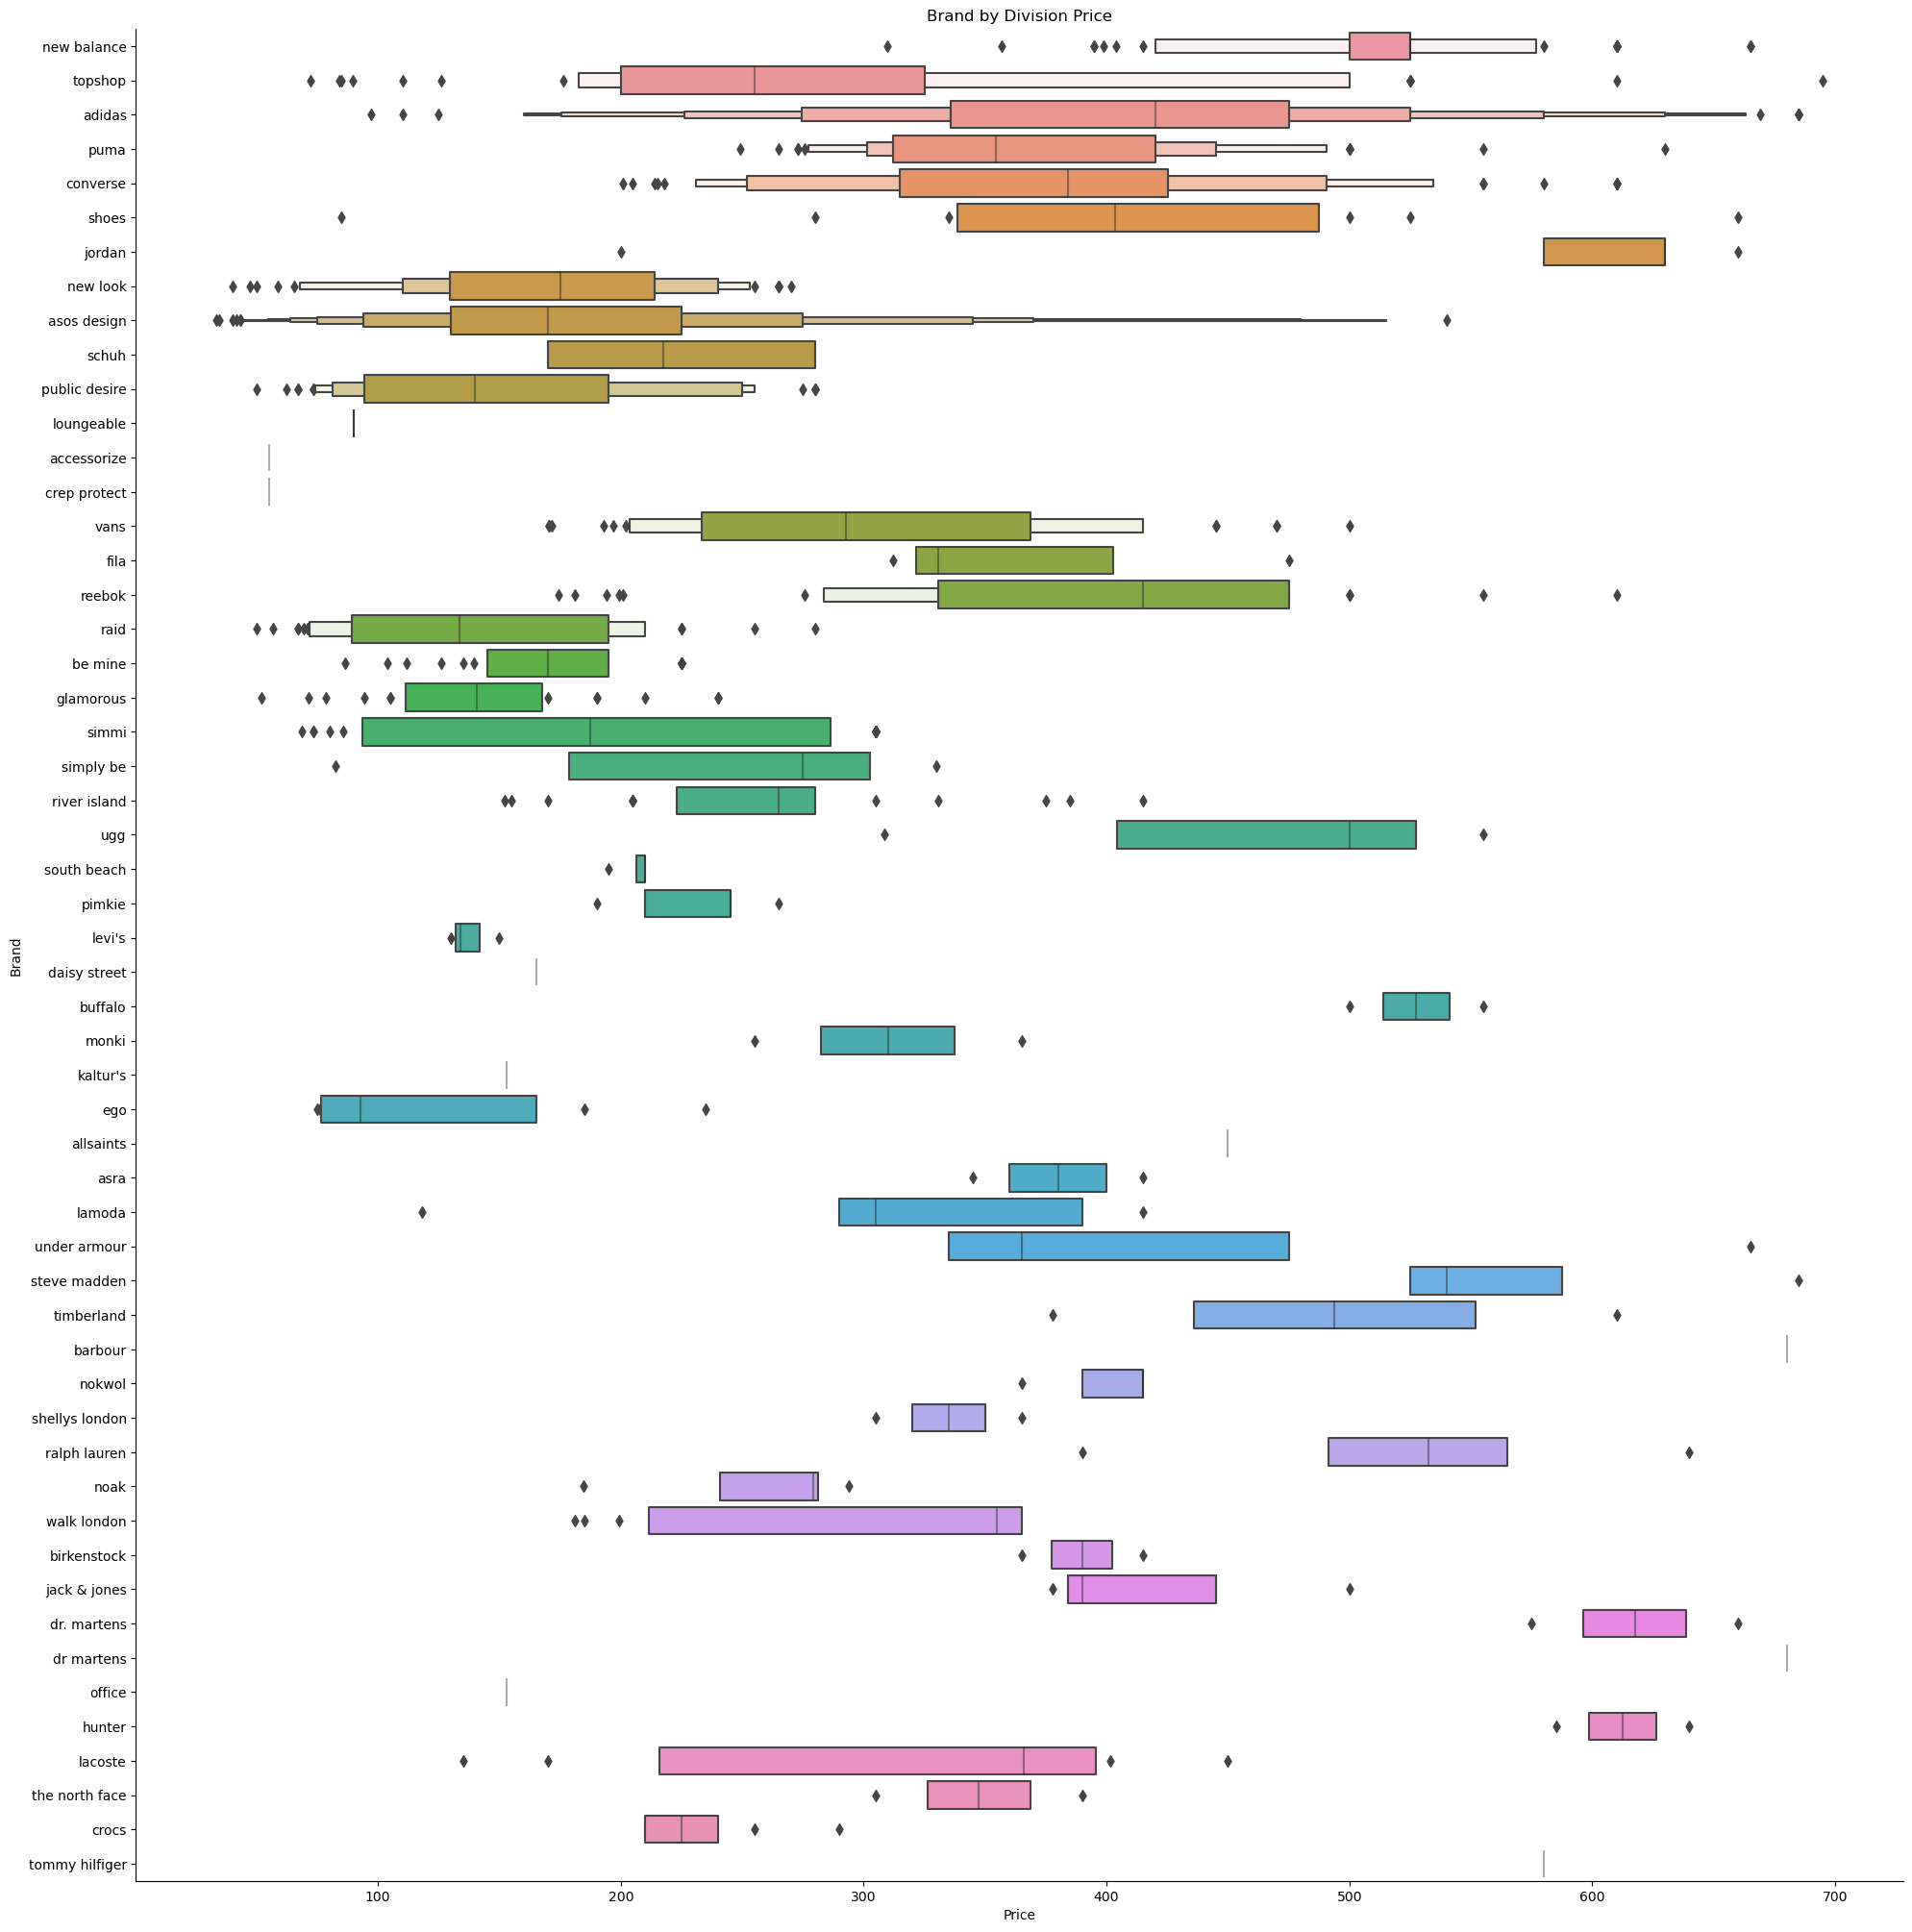

In [32]:
sns.catplot(data=df, x="Price", y="Brand" ,kind="boxen", orient="h", sharex=False, margin_titles=True, height=20, aspect=1,).set(title='Brand by Division Price')

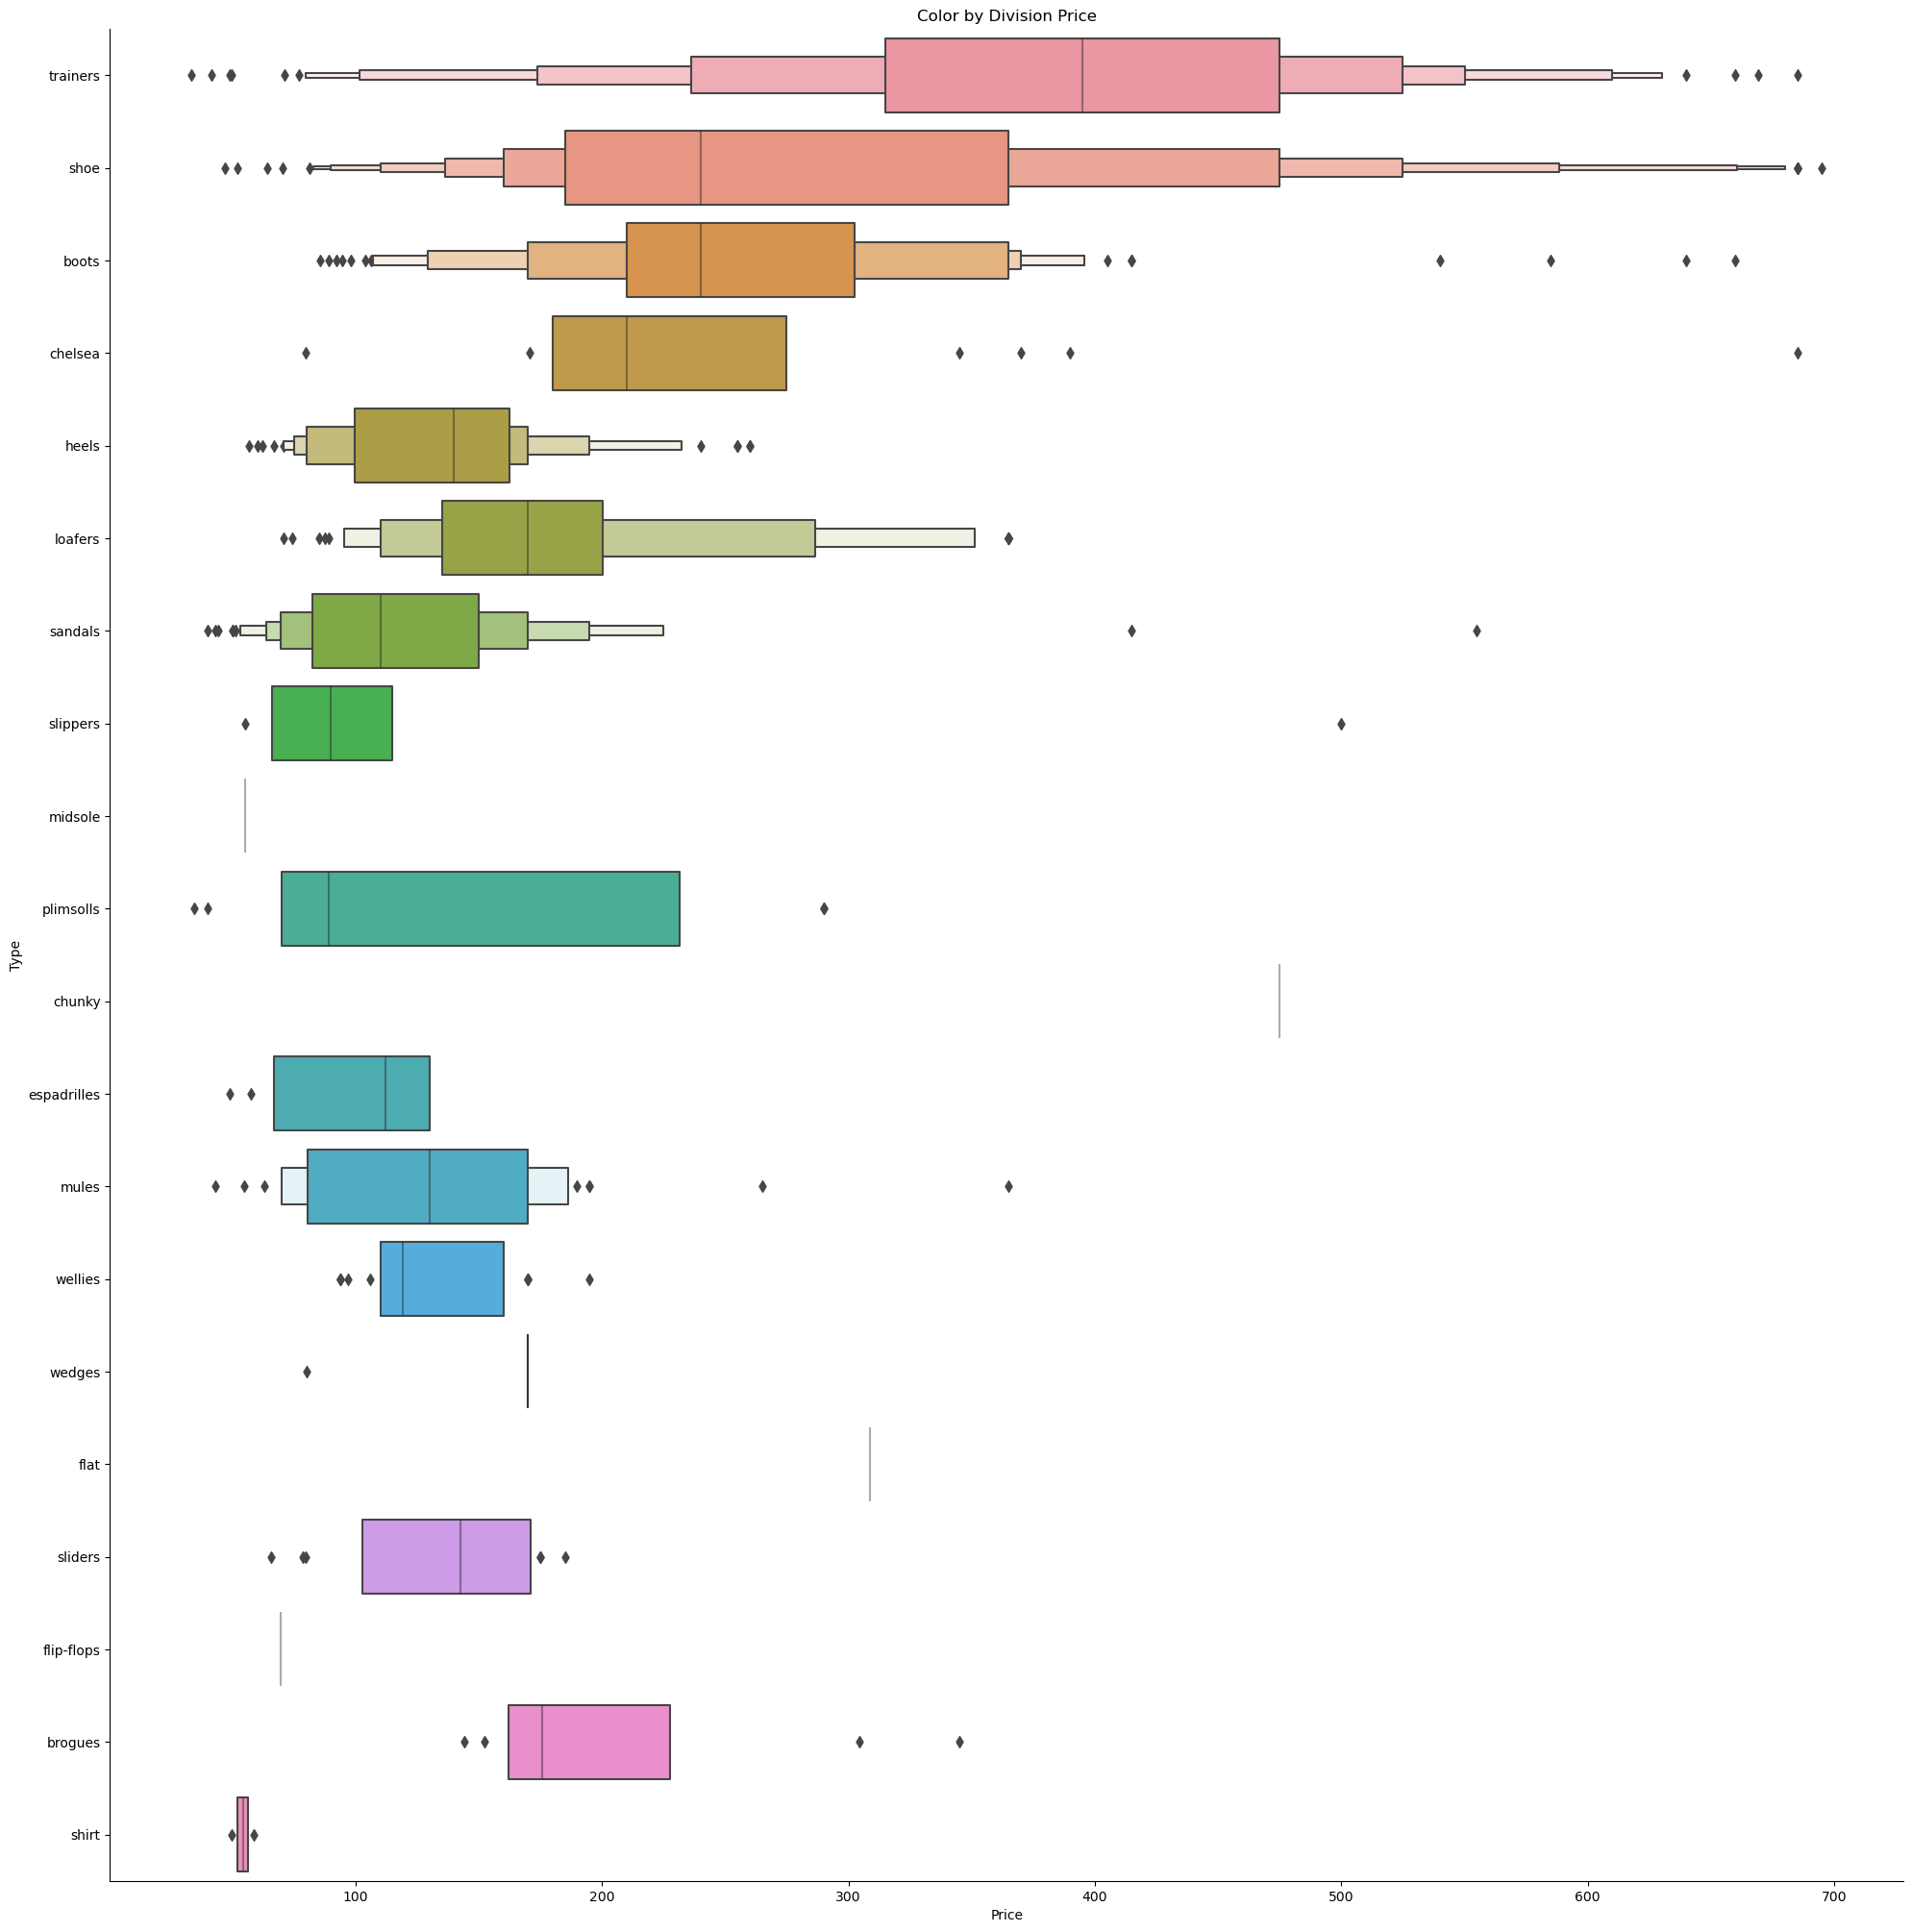

In [33]:
sns.catplot(data=df, x="Price", y="Type" ,kind="boxen", orient="h", sharex=False, margin_titles=True, height=20, aspect=1,).set(title='Color by Division Price')

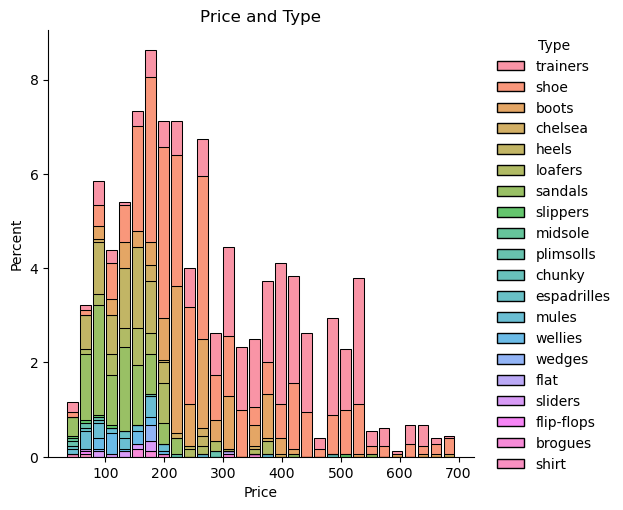

In [34]:
sns.displot(data=df, x="Price", hue="Type", multiple="stack",stat="percent", shrink=0.8 ,bins=30).set(title="Price and Type")

# Relationship With Price

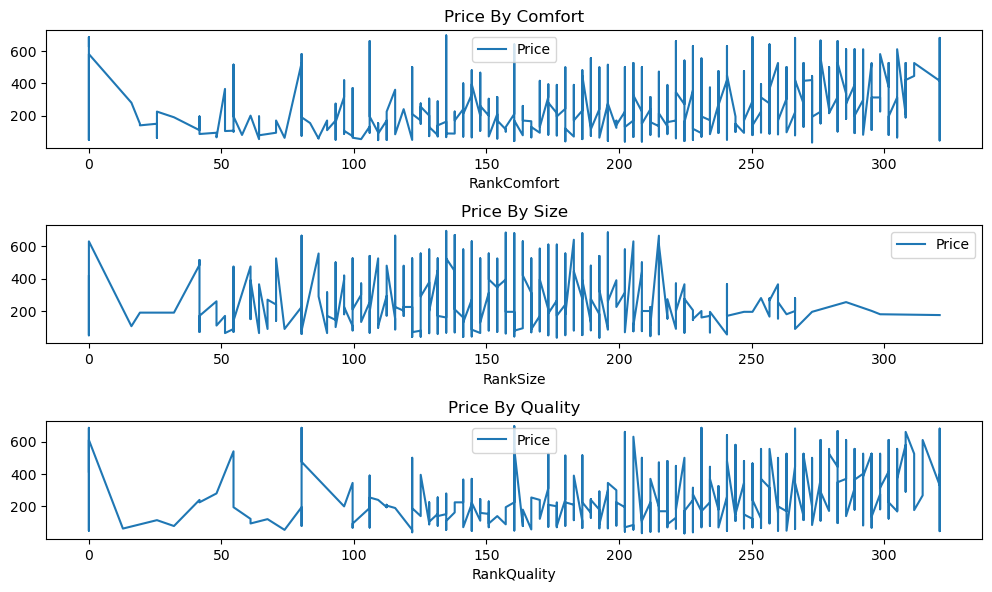

In [35]:
fig , axes = plt.subplots(3,1, figsize=(20,6))
df.sort_values(by="RankComfort",ascending=False , inplace=True)
df.plot.line(ax=axes[0],x="RankComfort" , y="Price", title="Price By Comfort",figsize=(10,6))
df.sort_values(by="RankSize",ascending=False , inplace=True)
df.plot.line(ax=axes[1],x="RankSize" , y="Price", title="Price By Size")
df.sort_values(by="RankQuality",ascending=False , inplace=True)
df.plot.line(ax=axes[2],x="RankQuality" , y="Price", title="Price By Quality")
fig.tight_layout(pad=1.0)

# The Influencing Column

In [ ]:
def MakeDataFrameByBrandColor(df):
    data1 = {"Brand": [] , "AvgPrice":[]}
    data2 = {"Color": [] , "AvgPrice":[]}
    data3 = {"Type": [] , "AvgPrice":[]}
    data4 = {"Upper": [] , "AvgPrice":[]}
    data5 = {"Sole": [] , "AvgPrice":[]}
    for x in df.Brand.unique():
        df1 = df[df["Brand"] == x]
        data1["Brand"].append(x)
        data1["AvgPrice"].append(df1.Price.mean())
    for x in df.Color.unique():
        df1 = df[df["Color"] == x]
        data2["Color"].append(x)
        data2["AvgPrice"].append(df1.Price.mean())
    for x in df.Type.unique():
        df1 = df[df["Type"] == x]
        data3["Type"].append(x)
        data3["AvgPrice"].append(df1.Price.mean())
    for x in df.Upper.unique():
        df1 = df[df["Upper"] == x]
        data4["Upper"].append(x)
        data4["AvgPrice"].append(df1.Price.mean())
    for x in df.Sole.unique():
        df1 = df[df["Sole"] == x]
        data5["Sole"].append(x)
        data5["AvgPrice"].append(df1.Price.mean())  
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)
    df3 = pd.DataFrame(data3)
    df4 = pd.DataFrame(data4)
    df5 = pd.DataFrame(data5)
    return df1 , df2 , df3 , df4 , df5

In [ ]:
df1 , df2,df3 ,df4, df5 = MakeDataFrameByBrandColor(df)

In [ ]:
x1 = list(df1["AvgPrice"])
x2 = list(df2["AvgPrice"])
x3 = list(df3["AvgPrice"])
x4 = list(df4["AvgPrice"])
x5 = list(df5["AvgPrice"])
sns.displot([x1 , x2 , x3,x4 ,x5], kind="kde", fill=False, facet_kws={'legend_out': False})
plt.legend(title='AvgPrice', loc='upper right', labels=["Sole", "Upper" , "Type" , 'Brand' ,'Color'])